# 3. Data Visualization

## *2. Importing libraries and the dataset*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
gapminder_df.head() #Display first few rows

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
recent_year = gapminder_df['year'].max() #Get the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year] #Filter the dataframe based on the most recent year
recent_year_df.shape #Shape of the new dataframe


(142, 6)

In [ ]:
# how per-capita GDP (i.e., gdpPercap feature) was distributed across
# all of the countries during the most recent year
recent_year_df['gdpPercap'].describe()


count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

## *3. Histograms*

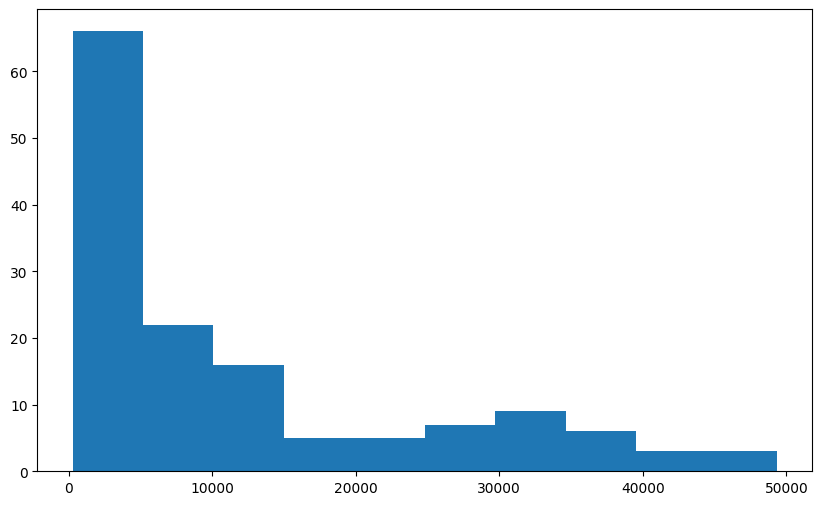

In [ ]:
plt.figure(figsize=(10, 6)) #Create a figure
plt.hist(recent_year_df['gdpPercap']); #Plot the histogram

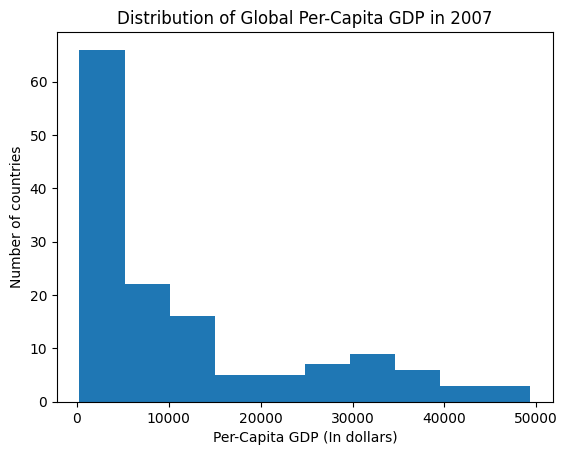

In [ ]:
plt.hist(recent_year_df['gdpPercap'])
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

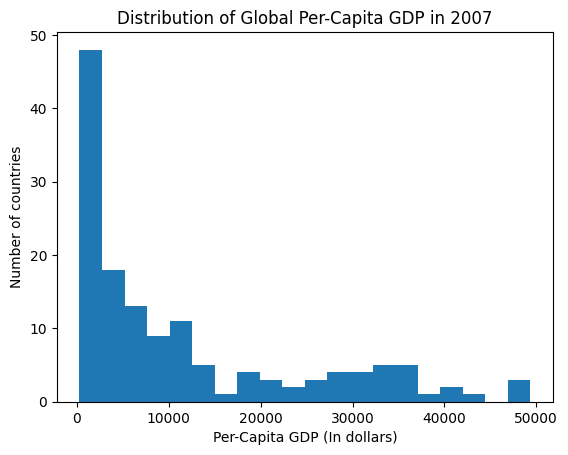

In [ ]:
plt.hist(recent_year_df['gdpPercap'], bins=20)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

### **TODO 1**

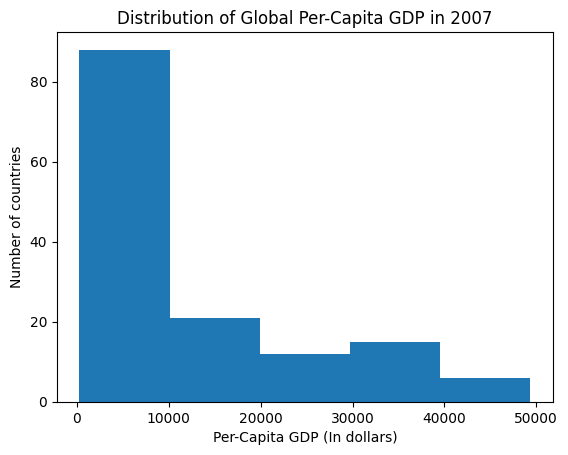

In [ ]:
plt.hist(recent_year_df['gdpPercap'], bins=5)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

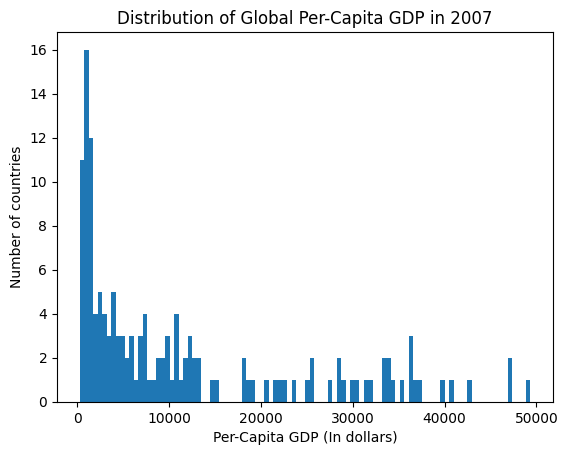

In [ ]:
plt.hist(recent_year_df['gdpPercap'], bins=100)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

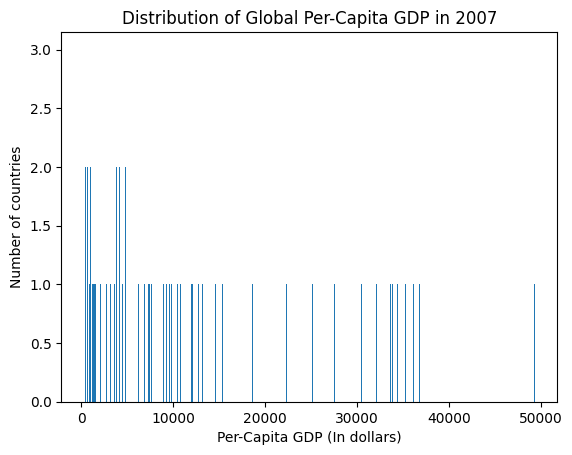

In [ ]:
plt.hist(recent_year_df['gdpPercap'], bins=1000)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

## *4. Bar plots*

In [ ]:
countries_df = gapminder_df[['country', 'continent']] #New dataframe with selected features
countries_df = countries_df.drop_duplicates() #Drop duplicate combinations
countries_df.shape

(142, 2)

In [ ]:
country_counts_df = countries_df.groupby('continent', as_index=False).agg('count')
country_counts_df.head()

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


range(0, 5)
0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object


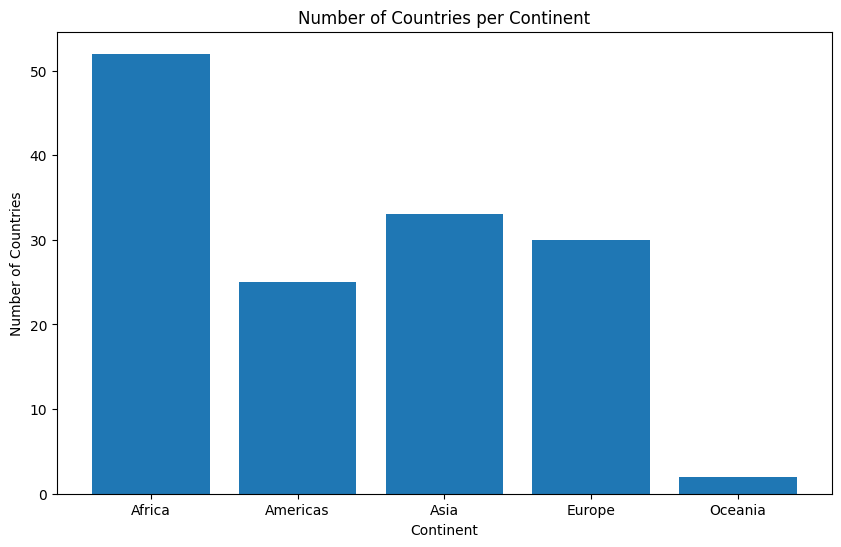

In [ ]:
no_continents = len(country_counts_df)
x = range(no_continents)
print(x)
y = country_counts_df['country']
continents = country_counts_df['continent']
print(continents)
3
plt.figure(figsize=(10, 6))
plt.bar(x, y) #Plot bar graph
plt.xlabel('Continent')
plt.ylabel('Number of Countries');
plt.title('Number of Countries per Continent')
plt.xticks(x, continents);

## *5. Box plots*

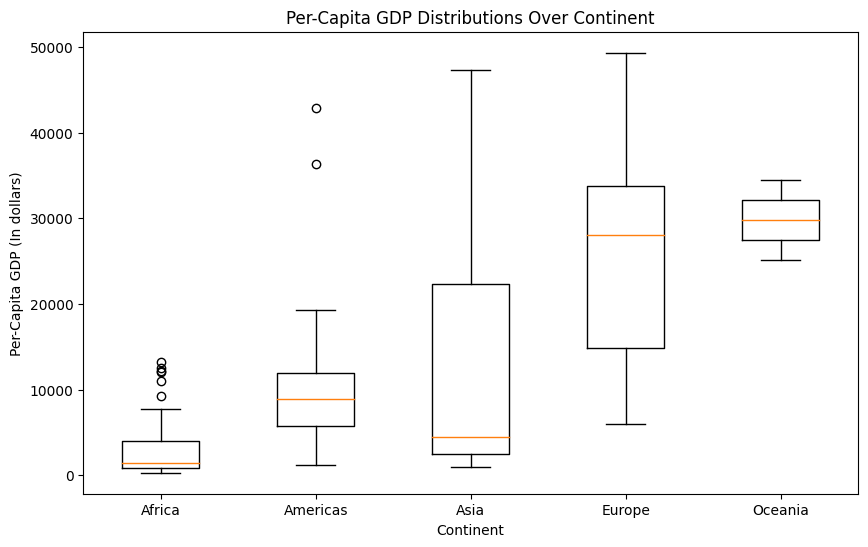

In [ ]:
continent_gdp_recent = []
for c in continents:
  cur_cont = recent_year_df[recent_year_df['continent'] == c] #New dataframe for current continent
  cur_gdp_vals = cur_cont['gdpPercap'].values #Store Per-capita GDP values of current continent in an array
  continent_gdp_recent.append(cur_gdp_vals) #Append values to the list


plt.figure(figsize=(10, 6))
plt.boxplot(continent_gdp_recent)
plt.title('Per-Capita GDP Distributions Over Continent')
plt.xlabel('Continent')
plt.ylabel('Per-Capita GDP (In dollars)')
plt.xticks(range(1, len(continents) + 1), continents);


## *6. Line plots*

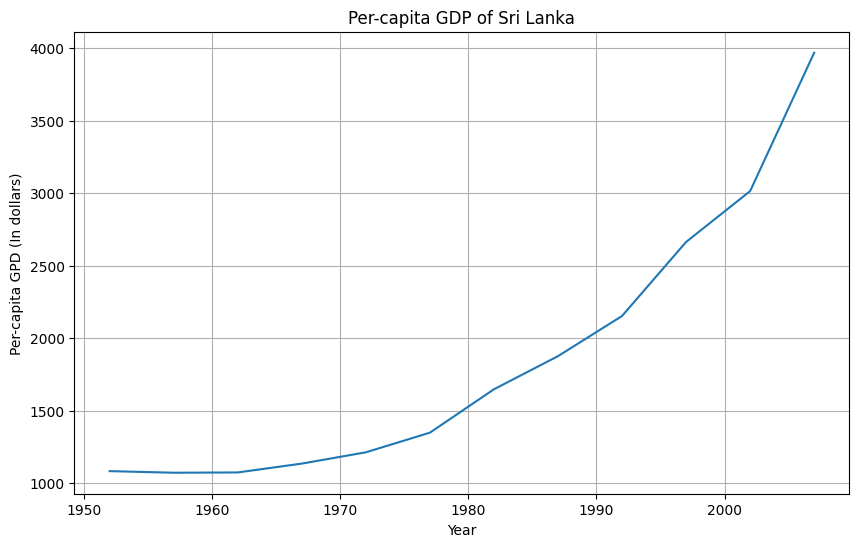

In [ ]:
# how the per capita GDP of Sri Lanka has changed over the years

lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
plt.figure(figsize=(10, 6))
plt.plot(lk['year'], lk['gdpPercap'])
plt.title('Per-capita GDP of Sri Lanka')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.grid();


### **TODO 2**

<Figure size 1000x600 with 0 Axes>

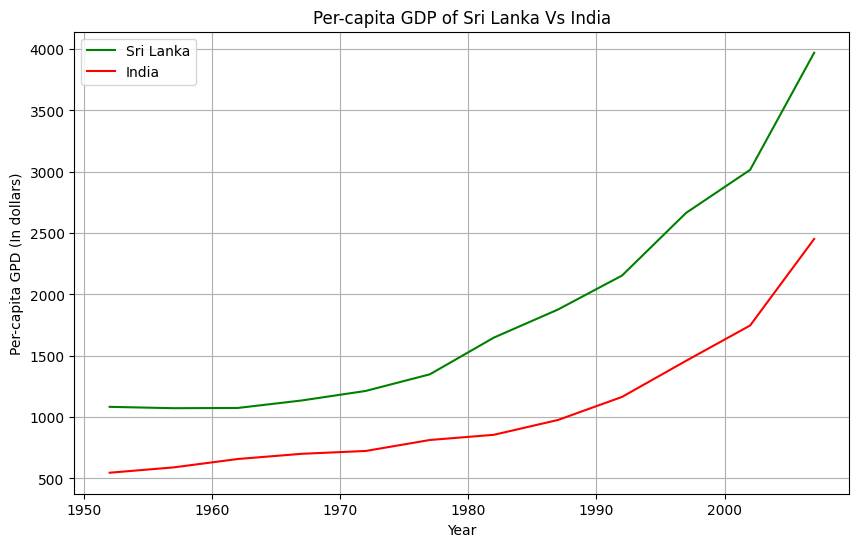

In [ ]:
# how the per capita GDP of Sri Lanka has changed over the years

lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
plt.figure(figsize=(10, 6))

In = gapminder_df[gapminder_df['country'] == 'India']
plt.figure(figsize=(10, 6))

plt.plot(lk['year'], lk['gdpPercap'],'g',label='Sri Lanka')
plt.plot(In['year'], In['gdpPercap'],'r',label='India')

plt.title('Per-capita GDP of Sri Lanka Vs India')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.grid()
plt.legend()
plt.show()




## *7. Scatter plots*

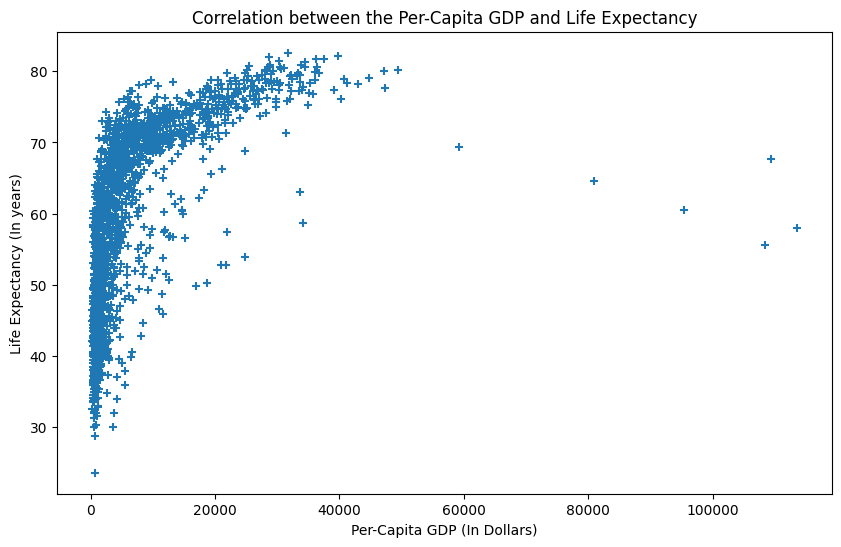

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(gapminder_df['gdpPercap'], gapminder_df['lifeExp'], marker='+')
plt.title('Correlation between the Per-Capita GDP and Life Expectancy')
plt.xlabel('Per-Capita GDP (In Dollars)')
plt.ylabel('Life Expectancy (In years)');

## *8. Heatmaps*


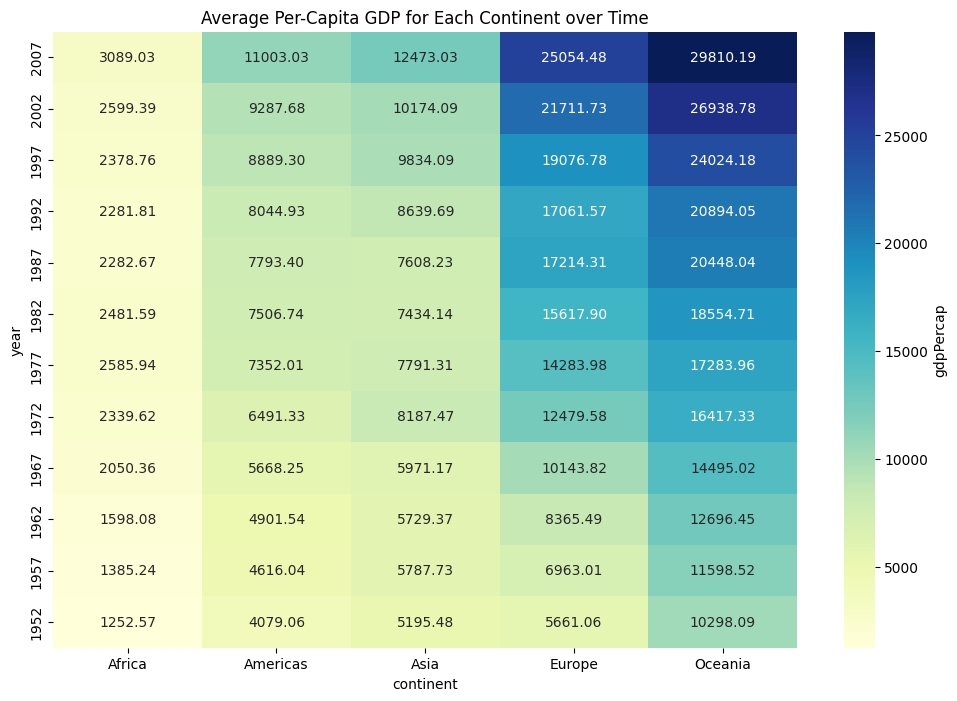

In [ ]:
per_continent_mean_gdp_df = gapminder_df.groupby(['continent', 'year'],
as_index=False)['gdpPercap'].mean()
plt.figure(figsize=(12, 8))
heatmap = per_continent_mean_gdp_df.pivot(index="year", columns="continent",values="gdpPercap")
heatmap = heatmap.sort_index(ascending=False)
heatmap_graph = sns.heatmap(heatmap, annot=True, fmt=".2f", cmap='YlGnBu',cbar_kws={'label': "gdpPercap"})
plt.title("Average Per-Capita GDP for Each Continent over Time");

## *9. Regression plots*

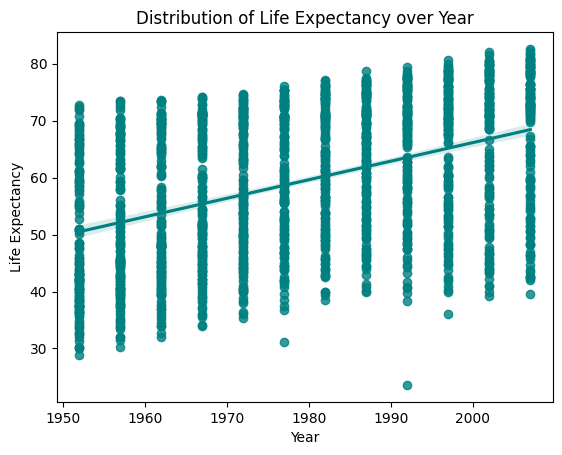

In [ ]:
sns.regplot(x='year', y='lifeExp', data=gapminder_df, color='teal')
plt.title('Distribution of Life Expectancy over Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy');


## *10. Kernel Density Estimate plots*

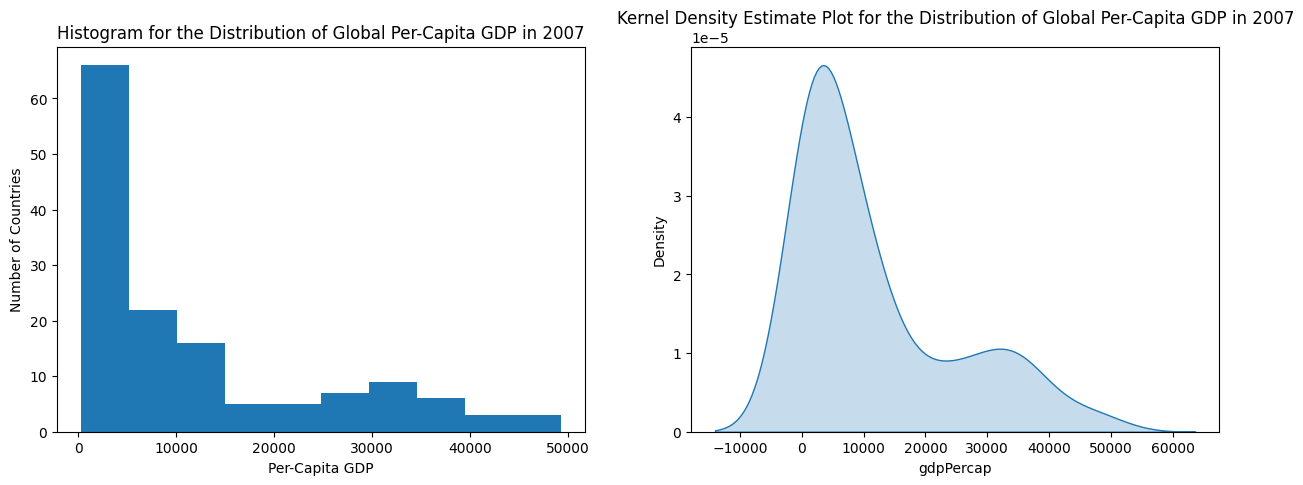

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(recent_year_df['gdpPercap'])
plt.xlabel('Per-Capita GDP')
plt.ylabel("Number of Countries")
plt.title('Histogram for the Distribution of Global Per-Capita GDP in 2007')
plt.subplot(1, 2, 2)
sns.kdeplot(recent_year_df['gdpPercap'], fill=True)
plt.title('Kernel Density Estimate Plot for the Distribution of Global Per-Capita GDP in 2007');


### **TODO 3**   -  Exploratory data analysis (EDA)


In [ ]:
# 1
df = pd.read_csv('winequality_red.csv', sep=',') # read the dataset
df.head()# display few rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 3.a
# check missing values

df.isnull().sum()



fixed acidity            0
volatile acidity        14
citric acid              0
residual sugar          12
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       5
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# 3.c
# impute the missing values by using the mean of the column
for col in df.columns:
  if df[col].isnull().sum() > 0:
	  df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

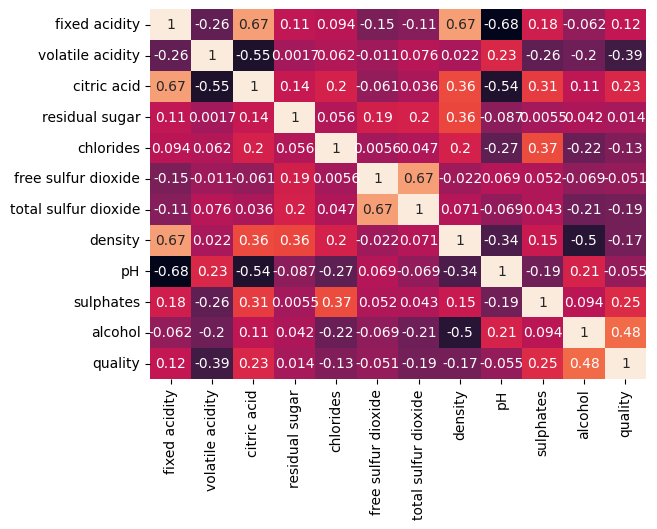

In [ ]:
# 4
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

Lower the correlation, lower is the attribute's importance.

    -> If the value is +1 or close to it then we say the variables are positively correlated. And they vary in the same direction simultaneously.
    -> If the value is -1 or close to it then we say the variables are negatively correlated. And they vary in the opposite direction simultaneously.
    -> If the value is 0 or close to it then we say the variables are not correlated.

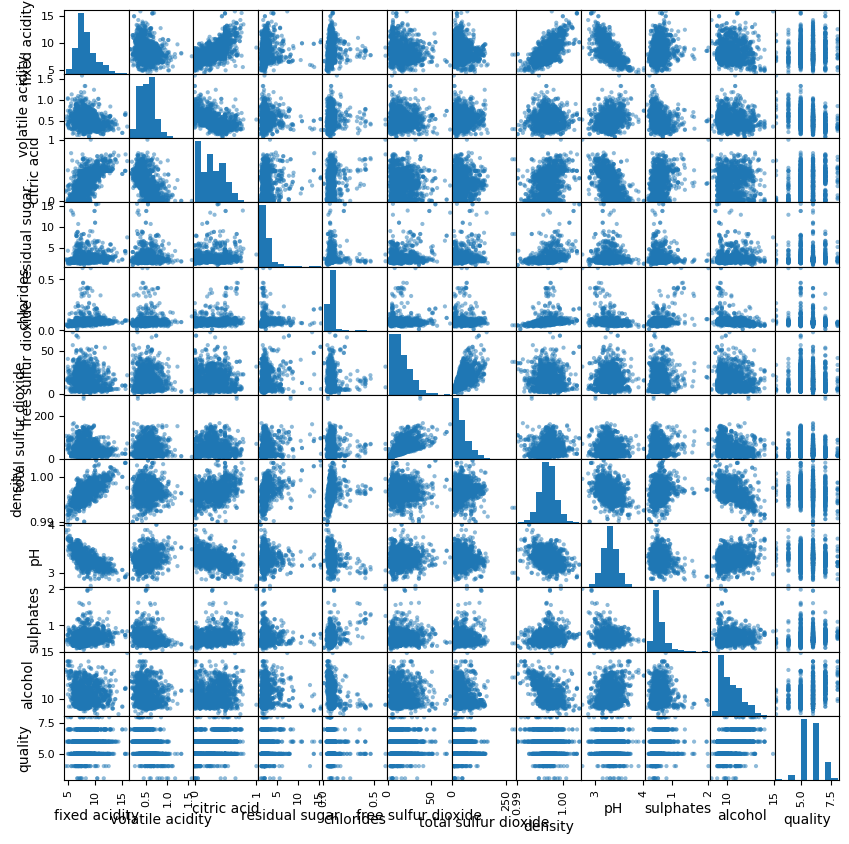

In [ ]:
# 5
# Visualize the relationship between each pair of attributes using a scatter matrix
# from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df, figsize=(10,10))
#scatter_matrix(df, figsize=(10,10))
plt.show()


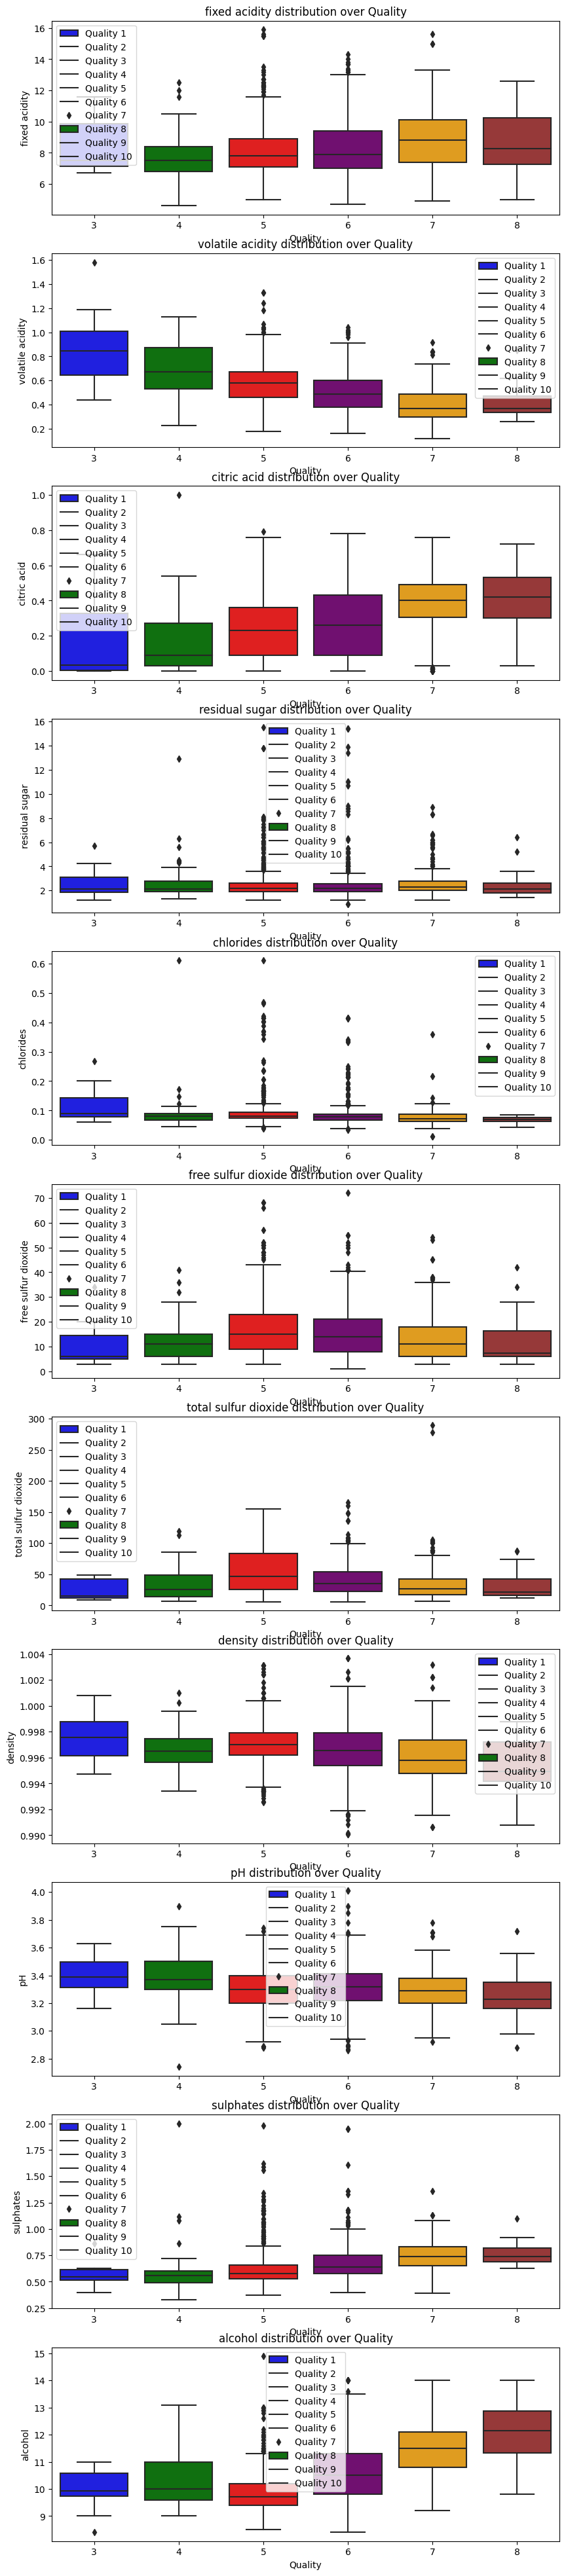

In [ ]:
# 6

fig, axs = plt.subplots(ncols=1, nrows=len(df.columns)-1, figsize=(10,50))
#colors = ['blue', 'green', 'purple', 'orange', 'red', 'yellow', 'brown']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, column_name in enumerate(df.columns[:-1]):
    sns.boxplot(x='quality', y=column_name, data=df, ax=axs[i], palette=colors)
    axs[i].set_xlabel('Quality')
    axs[i].set_ylabel(column_name)
    axs[i].set_title(f'{column_name} distribution over Quality')
    axs[i].legend([f'Quality {j}' for j in range(1, 11)])
   

plt.show()





In [ ]:
# 8 - b
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized)
print('\n')

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_standardized)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260         0.00        0.068493   0.106845   
1          0.283186          0.520548         0.00        0.116438   0.143573   
2          0.283186          0.438356         0.04        0.095890   0.133556   
3          0.584071          0.109589         0.56        0.068493   0.105175   
4          0.247788          0.397260         0.00        0.068493   0.106845   
...             ...               ...          ...             ...        ...   
1594       0.141593          0.328767         0.08        0.075342   0.130217   
1595       0.115044          0.294521         0.10        0.089041   0.083472   
1596       0.150442          0.267123         0.13        0.095890   0.106845   
1597       0.115044          0.359589         0.12        0.075342   0.105175   
1598       0.123894          0.130137         0.47        0.184932   0.091820   

      free sulfur dioxide  

In [ ]:
!pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 9
# Generate a data profiling report

from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Wine Quality Data Profiling Report')
profile.to_file(output_file="wine_quality_data_profiling_report.html")


<ipython-input-168-3ede8fbc621b>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead. from pandas_profiling import ProfileReport
import ydata_profiling
profile = ProfileReport(df, title='Wine Quality Data Profiling Report 2')
profile.to_file(output_file="wine_quality_data_profiling_report_2.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]